In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [75]:
def one_step_survival(r, sigma, S0, q, put_strike, barrier, dt, n_simulations, m_observations, notional):
    p_table, l_table = np.zeros(n_simulations), np.ones(n_simulations)
    s = S0*np.ones(n_simulations)
    tj = dt
    coupon = q*np.ones(n_simulations)
    for _ in range(m_observations):
        d = (np.log(barrier/s) - (r - sigma**2/2)*dt)/(sigma*np.sqrt(dt))
        p = norm.cdf(d)
        p_table += (1 - p)*l_table*np.exp(-r*tj)*notional*(1 + coupon)
        l_table *= p
        u = np.random.uniform(0, 1, size=(n_simulations,))
        s *= np.exp((r - sigma**2/2)*dt + sigma*np.sqrt(dt)*norm.ppf(p*u))
        tj += dt
        coupon += q
    payoff_at_expiry = notional - np.maximum(0, put_strike - s)
    p_table += l_table*np.exp(-r*m_observations*dt)*payoff_at_expiry
    return p_table      


In [76]:
one_step_survival(.03, .2, 100, .06, 70, 100, .25, 10**5, 4, 100).mean()

104.82798443225147

In [79]:
vols = np.linspace(.05, .5, 50)
prices = []
for v in vols:
    sim = one_step_survival(
        r=.03, sigma=v, S0=100, q=.06, put_strike=70, barrier=100, dt=.25, n_simulations=10**5, m_observations=4, notional=100
    )
    prices.append(sim.mean())
prices = np.array(prices)

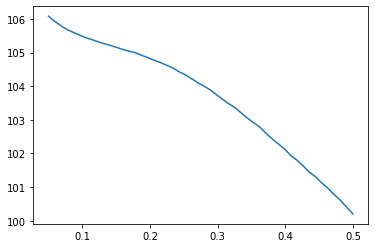

In [80]:
plt.plot(vols, prices)